# Baixando dados

In [78]:
# Import the DataLoader class from the get_data_from_db module
from get_data_from_db import DataLoader

# Initialize the DataLoader
data_loader = DataLoader()

# Get the dataset path
path = data_loader.path
print(f"Dataset path: {path}")

# Get test and train data
test_data = data_loader.get_test_data()
train_data = data_loader.get_train_data()

print(f"Number of test images: {len(test_data)}")
print(f"Number of train images: {len(train_data)}")
print(f"Sample test files: {test_data[:5] if len(test_data) > 5 else test_data}")
print(f"Sample train files: {train_data[:5] if len(train_data) > 5 else train_data}")

Dataset downloaded/cached at: C:\Users\mathe\.cache\kagglehub\datasets\francismon\curated-colon-dataset-for-deep-learning\versions\1
Dataset path: C:\Users\mathe\.cache\kagglehub\datasets\francismon\curated-colon-dataset-for-deep-learning\versions\1
Number of test images: 200
Number of train images: 3200
Sample test files: ['test_normal_ (1).jpg', 'test_normal_ (10).jpg', 'test_normal_ (100).jpg', 'test_normal_ (101).jpg', 'test_normal_ (102).jpg']
Sample train files: [('train_normal_ (1).jpg', 0), ('train_normal_ (10).jpg', 0), ('train_normal_ (100).jpg', 0), ('train_normal_ (101).jpg', 0), ('train_normal_ (102).jpg', 0)]


Os arquivos já estavam separados em treino e teste

Obtendo os arquivos de treino

In [79]:
# Using the DataLoader to get all category paths and files
import os

# Get all test categories (normal)
test_normal_path = os.path.join(path, "test", "0_normal")
test_normal_files = os.listdir(test_normal_path)

# Get all train categories
train_normal_path = os.path.join(path, "train", "0_normal")
train_normal_files = os.listdir(train_normal_path)

train_ulcerative_colitis_path = os.path.join(path, "train", "1_ulcerative_colitis")
train_ulcerative_colitis_files = os.listdir(train_ulcerative_colitis_path)

train_polyps_path = os.path.join(path, "train", "2_polyps")
train_polyps_files = os.listdir(train_polyps_path)

train_esophagitis_path = os.path.join(path, "train", "3_esophagitis")
train_esophagitis_files = os.listdir(train_esophagitis_path)

# Print summary of all categories
print("Dataset Summary:")
print(f"Test Normal: {len(test_normal_files)} images")
print(f"Train Normal: {len(train_normal_files)} images")
print(f"Train Ulcerative Colitis: {len(train_ulcerative_colitis_files)} images")
print(f"Train Polyps: {len(train_polyps_files)} images")
print(f"Train Esophagitis: {len(train_esophagitis_files)} images")

# Total counts
total_test = len(test_normal_files)
total_train = len(train_normal_files) + len(train_ulcerative_colitis_files) + len(train_polyps_files) + len(train_esophagitis_files)
print(f"\nTotal Test Images: {total_test}")
print(f"Total Train Images: {total_train}")
print(f"Total Dataset: {total_test + total_train} images")

Dataset Summary:
Test Normal: 200 images
Train Normal: 800 images
Train Ulcerative Colitis: 800 images
Train Polyps: 800 images
Train Esophagitis: 800 images

Total Test Images: 200
Total Train Images: 3200
Total Dataset: 3400 images


In [80]:
# Complete dataset analysis including validation data
import importlib
importlib.reload(get_data_from_db)
from get_data_from_db import DataLoader

# Create a new DataLoader instance with enhanced features
enhanced_loader = DataLoader()

# Get all category counts including validation
counts = enhanced_loader.get_category_counts()
print("Complete Dataset Counts:")
for category, count in counts.items():
    print(f"  {category}: {count} images")

# Calculate totals by split
test_total = counts['test_normal']
train_total = counts['train_normal'] + counts['train_ulcerative_colitis'] + counts['train_polyps'] + counts['train_esophagitis']
val_total = counts['val_normal'] + counts['val_ulcerative_colitis'] + counts['val_polyps'] + counts['val_esophagitis']
total_images = test_total + train_total + val_total

print(f"\nDataset Split Summary:")
print(f"  Training: {train_total} images")
print(f"  Validation: {val_total} images")
print(f"  Testing: {test_total} images")
print(f"  Total: {total_images} images")

# Get validation data organized by category
validation_by_category = enhanced_loader.get_validation_data()
print(f"\nValidation data categories: {list(validation_by_category.keys())}")

# Get validation data with labels
validation_with_labels = enhanced_loader.get_validation_data_with_labels()
print(f"Total validation samples with labels: {len(validation_with_labels)}")
print("Sample validation data with labels:")
category_names = ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']
for i in range(min(5, len(validation_with_labels))):
    filename, label = validation_with_labels[i]
    print(f"  {filename} -> {category_names[label]} (label: {label})")

# Show distribution across categories
print(f"\nCategory Distribution:")
for i, category in enumerate(category_names):
    train_count = counts[f'train_{category}']
    val_count = counts[f'val_{category}']
    test_count = counts['test_normal'] if category == 'normal' else 0
    print(f"  {category.upper()}:")
    print(f"    Train: {train_count}, Val: {val_count}, Test: {test_count}")
    print(f"    Total: {train_count + val_count + test_count}")

Dataset downloaded/cached at: C:\Users\mathe\.cache\kagglehub\datasets\francismon\curated-colon-dataset-for-deep-learning\versions\1
Complete Dataset Counts:
  test_normal: 200 images
  train_normal: 800 images
  train_ulcerative_colitis: 800 images
  train_polyps: 800 images
  train_esophagitis: 800 images
  val_normal: 500 images
  val_ulcerative_colitis: 500 images
  val_polyps: 500 images
  val_esophagitis: 500 images

Dataset Split Summary:
  Training: 3200 images
  Validation: 2000 images
  Testing: 200 images
  Total: 5400 images

Validation data categories: ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']
Total validation samples with labels: 2000
Sample validation data with labels:
  val_normal_ (1).jpg -> normal (label: 0)
  val_normal_ (10).jpg -> normal (label: 0)
  val_normal_ (100).jpg -> normal (label: 0)
  val_normal_ (101).jpg -> normal (label: 0)
  val_normal_ (102).jpg -> normal (label: 0)

Category Distribution:
  NORMAL:
    Train: 800, Val: 500, Test: 200

# Análise Completa do Dataset

O dataset está organizado em três divisões:

## Estrutura do Dataset:
- **Treino (train/)**: 3.200 imagens (800 por categoria)
- **Validação (val/)**: 2.000 imagens (500 por categoria)  
- **Teste (test/)**: 200 imagens (apenas categoria normal)

## Categorias:
1. **Normal (0)**: Imagens normais do cólon
2. **Ulcerative Colitis (1)**: Colite ulcerativa
3. **Polyps (2)**: Pólipos
4. **Esophagitis (3)**: Esofagite

## Total: 5.400 imagens

**Nota**: O conjunto de teste contém apenas imagens da categoria "normal", enquanto treino e validação contêm todas as 4 categorias balanceadas.

In [81]:
# Example: How to use the DataLoader for machine learning workflows
import numpy as np

# Get all data splits with labels
train_data_with_labels = enhanced_loader.get_train_data()
val_data_with_labels = enhanced_loader.get_validation_data_with_labels()
test_data_files = enhanced_loader.get_test_data()  # Only normal images

print("Data for Machine Learning:")
print(f"Training samples: {len(train_data_with_labels)} (with labels)")
print(f"Validation samples: {len(val_data_with_labels)} (with labels)")
print(f"Test samples: {len(test_data_files)} (normal only)")

# Example: Extract labels for analysis
train_labels = [label for _, label in train_data_with_labels]
val_labels = [label for _, label in val_data_with_labels]

print(f"\nLabel distribution in training:")
unique_labels, train_counts = np.unique(train_labels, return_counts=True)
for label, count in zip(unique_labels, train_counts):
    print(f"  Label {label} ({category_names[label]}): {count} samples")

print(f"\nLabel distribution in validation:")
unique_labels, val_counts = np.unique(val_labels, return_counts=True)
for label, count in zip(unique_labels, val_counts):
    print(f"  Label {label} ({category_names[label]}): {count} samples")

# Example: Get full file paths for a specific category
normal_train_files = enhanced_loader.get_train_data_by_category()['normal']
normal_val_files = enhanced_loader.get_validation_data()['normal']

print(f"\nExample file paths for 'normal' category:")
print(f"  Train path: {enhanced_loader.train_normal_path}")
print(f"  Validation path: {enhanced_loader.validation_normal_path}")
print(f"  Sample files: {normal_train_files[:3]} (train), {normal_val_files[:3]} (val)")

Data for Machine Learning:
Training samples: 3200 (with labels)
Validation samples: 2000 (with labels)
Test samples: 200 (normal only)

Label distribution in training:
  Label 0 (normal): 800 samples
  Label 1 (ulcerative_colitis): 800 samples
  Label 2 (polyps): 800 samples
  Label 3 (esophagitis): 800 samples

Label distribution in validation:
  Label 0 (normal): 500 samples
  Label 1 (ulcerative_colitis): 500 samples
  Label 2 (polyps): 500 samples
  Label 3 (esophagitis): 500 samples

Example file paths for 'normal' category:
  Train path: C:\Users\mathe\.cache\kagglehub\datasets\francismon\curated-colon-dataset-for-deep-learning\versions\1\train\0_normal
  Validation path: C:\Users\mathe\.cache\kagglehub\datasets\francismon\curated-colon-dataset-for-deep-learning\versions\1\val\0_normal
  Sample files: ['train_normal_ (1).jpg', 'train_normal_ (10).jpg', 'train_normal_ (100).jpg'] (train), ['val_normal_ (1).jpg', 'val_normal_ (10).jpg', 'val_normal_ (100).jpg'] (val)


# Modelo de Machine Learning para Classificação

Agora vamos implementar um modelo de deep learning (CNN - Convolutional Neural Network) para classificar as imagens de cólon nas 4 categorias:

1. **Normal (0)**
2. **Ulcerative Colitis (1)**  
3. **Polyps (2)**
4. **Esophagitis (3)**

O modelo será treinado usando:
- **3.200 imagens de treino** (800 por categoria)
- **2.000 imagens de validação** (500 por categoria)
- **200 imagens de teste** (apenas normal - para detecção de anomalias)

In [82]:
# Install required packages
%pip install opencv-python scikit-learn

# Import necessary libraries for machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import random

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")
print(f"Number of GPUs: {len(tf.config.list_physical_devices('GPU'))}")

Note: you may need to restart the kernel to use updated packages.
TensorFlow version: 2.20.0-rc0
GPU Available: []
Number of GPUs: 0



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


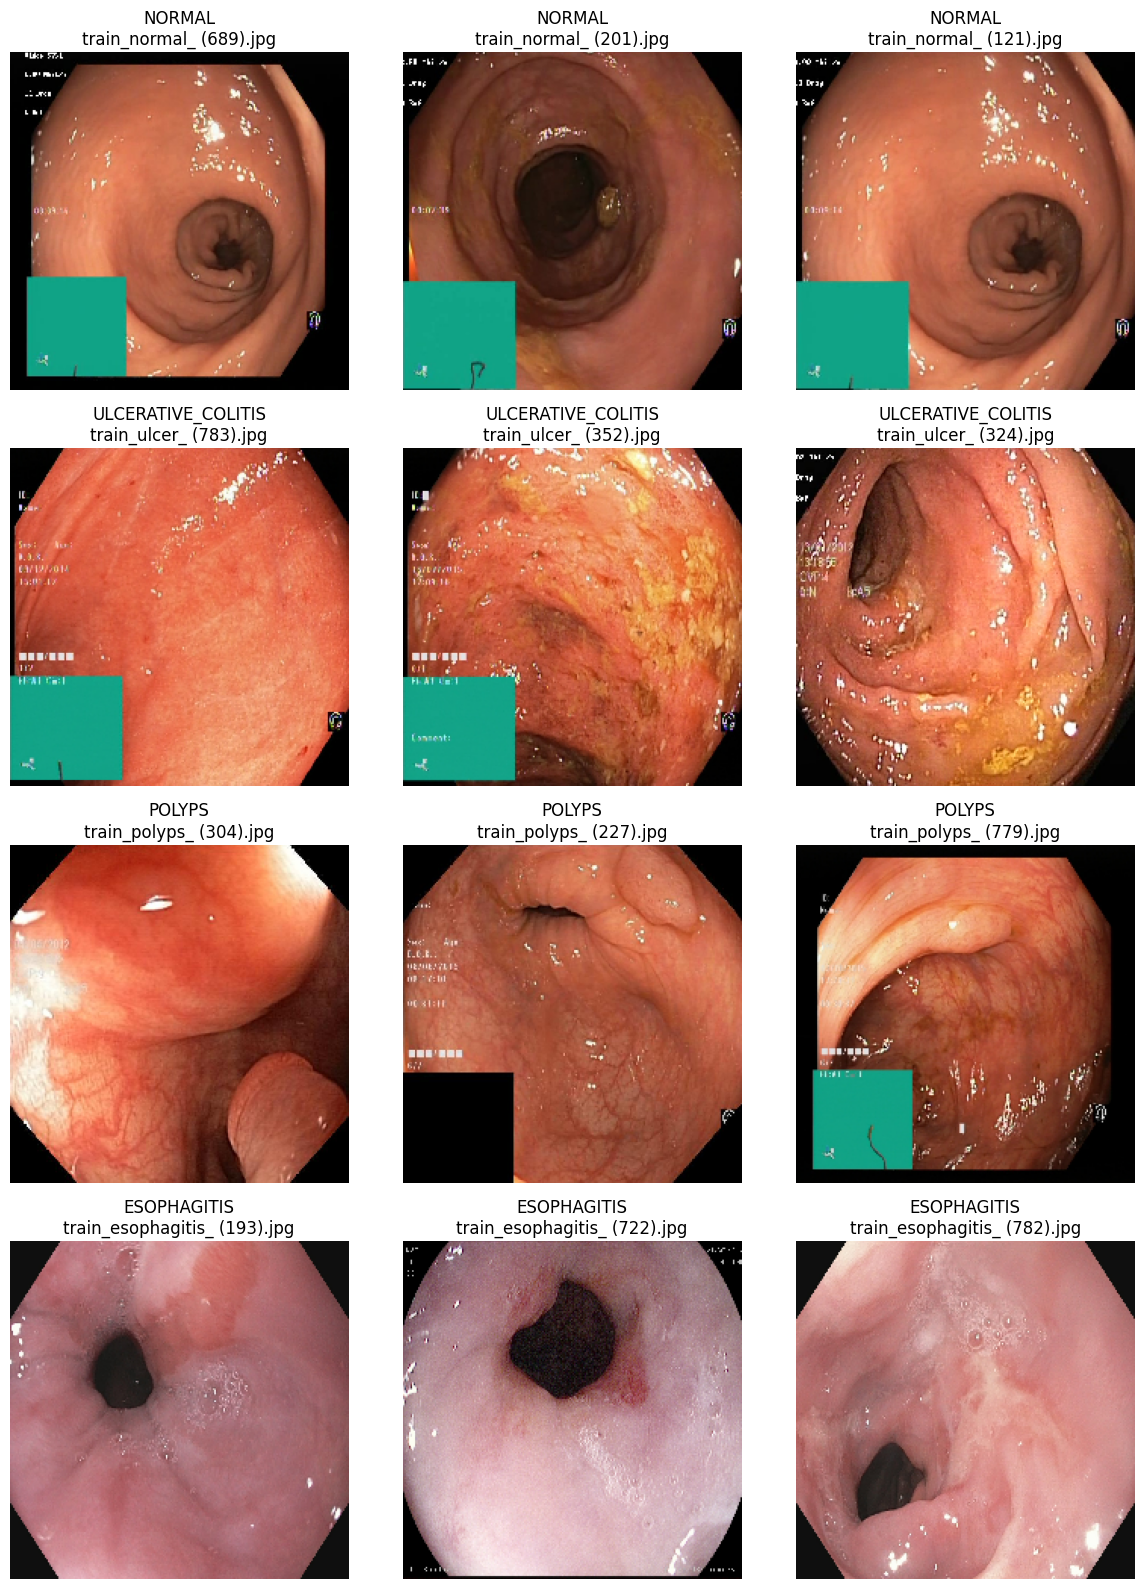

In [83]:
# Visualize sample images from each category
def show_sample_images(enhanced_loader, num_samples=2):
    """Display sample images from each category"""
    
    category_names = ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']
    category_paths = {
        'normal': enhanced_loader.train_normal_path,
        'ulcerative_colitis': enhanced_loader.train_ulcerative_colitis_path,
        'polyps': enhanced_loader.train_polyps_path,
        'esophagitis': enhanced_loader.train_esophagitis_path
    }
    
    fig, axes = plt.subplots(4, num_samples, figsize=(12, 16))
    
    for i, category in enumerate(category_names):
        files = os.listdir(category_paths[category])
        sample_files = random.sample(files, num_samples)
        
        for j, filename in enumerate(sample_files):
            img_path = os.path.join(category_paths[category], filename)
            img = load_img(img_path, target_size=(224, 224))
            
            axes[i, j].imshow(img)
            axes[i, j].set_title(f'{category.upper()}\n{filename}')
            axes[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Show sample images
show_sample_images(enhanced_loader, num_samples=3)

In [84]:
# Create data generators for training and validation
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 4

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Only rescaling for validation (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators using the directory structure
train_generator = train_datagen.flow_from_directory(
    os.path.join(enhanced_loader.path, 'train'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(enhanced_loader.path, 'val'),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

print(f"Training generator: {train_generator.samples} samples")
print(f"Validation generator: {val_generator.samples} samples")
print(f"Class indices: {train_generator.class_indices}")
print(f"Number of classes: {train_generator.num_classes}")

# Calculate steps per epoch
STEPS_PER_EPOCH = train_generator.samples // BATCH_SIZE
VALIDATION_STEPS = val_generator.samples // BATCH_SIZE

print(f"Steps per epoch: {STEPS_PER_EPOCH}")
print(f"Validation steps: {VALIDATION_STEPS}")

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Training generator: 3200 samples
Validation generator: 2000 samples
Class indices: {'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}
Number of classes: 4
Steps per epoch: 100
Validation steps: 62
Found 2000 images belonging to 4 classes.
Training generator: 3200 samples
Validation generator: 2000 samples
Class indices: {'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}
Number of classes: 4
Steps per epoch: 100
Validation steps: 62


In [85]:
# Create CNN models
def create_custom_cnn(input_shape=(224, 224, 3), num_classes=4):
    """Create a custom CNN model"""
    
    model = keras.Sequential([
        # First Conv Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        
        # Second Conv Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        
        # Third Conv Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        
        # Fourth Conv Block
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        
        # Classifier
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

def create_transfer_learning_model(input_shape=(224, 224, 3), num_classes=4):
    """Create a transfer learning model using VGG16"""
    
    # Load pre-trained VGG16 model
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    # Freeze base model layers
    base_model.trainable = False
    
    # Add custom classification head
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model, base_model

# Create both models
print("Creating Custom CNN model...")
custom_model = create_custom_cnn()
custom_model.summary()

print("\\n" + "="*50)
print("Creating Transfer Learning model (VGG16)...")
transfer_model, base_model = create_transfer_learning_model()
transfer_model.summary()

Creating Custom CNN model...


C:\Users\mathe\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_11     │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,972 (2.00 MB)

 Trainable params: 523,012 (2.00 MB)

 Non-trainable params: 960 (3.75 KB)

\n==================================================
Creating Transfer Learning model (VGG16)...


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,111,748 (57.65 MB)

 Trainable params: 396,036 (1.51 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
# Compile and train the transfer learning model (VGG16)
# We'll focus on the transfer learning model as it typically performs better

# Compile the model
transfer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.0001,
        verbose=1
    )
]

print("Starting training of Transfer Learning Model (VGG16)...")
print(f"Training for maximum of 20 epochs with early stopping...")

# Train the model
EPOCHS = 10

history = transfer_model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=VALIDATION_STEPS,
    callbacks=callbacks,
    verbose=1
)

print("Training completed!")

Starting training of Transfer Learning Model (VGG16)...
Training for maximum of 20 epochs with early stopping...


C:\Users\mathe\AppData\Roaming\Python\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.5216 - loss: 1.2415 - precision: 0.5677 - recall: 0.4387 - val_accuracy: 0.3044 - val_loss: 1.3137 - val_precision: 0.4159 - val_recall: 0.2581 - learning_rate: 0.0010
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.5216 - loss: 1.2415 - precision: 0.5677 - recall: 0.4387 - val_accuracy: 0.3044 - val_loss: 1.3137 - val_precision: 0.4159 - val_recall: 0.2581 - learning_rate: 0.0010
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6741 - loss: 0.8328 - precision: 0.7077 - recall: 0.6288 - val_accuracy: 0.3332 - val_loss: 1.4412 - val_precision: 0.3522 - val_recall: 0.2918 - learning_rate: 0.0010
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.6741 - loss: 0.8328 - precision: 0.7077 - recall: 0.6288 - val_accuracy: 0.3332 - val_loss: 1.4412 - val_precision: 0.3522 - val_recall: 0.2918 - learning_rate: 0.0010
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accur

# Avaliação e Teste do Modelo

Agora vamos avaliar o desempenho do modelo treinado usando métricas detalhadas e visualizações:

1. **Plotar curvas de treinamento** (loss e accuracy)
2. **Avaliar no conjunto de validação** 
3. **Gerar matriz de confusão**
4. **Calcular métricas detalhadas** (precision, recall, F1-score)
5. **Testar predições** em imagens individuais

In [ ]:
# Plot training history
def plot_training_history(history):
    """Plot training and validation metrics"""
    
    # Get metrics from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    # Create subplots
    plt.figure(figsize=(15, 5))
    
    # Plot accuracy
    plt.subplot(1, 3, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    
    # Plot loss
    plt.subplot(1, 3, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    # Plot additional metrics if available
    plt.subplot(1, 3, 3)
    if 'precision' in history.history:
        plt.plot(epochs_range, history.history['precision'], label='Training Precision')
        plt.plot(epochs_range, history.history['val_precision'], label='Validation Precision')
    if 'recall' in history.history:
        plt.plot(epochs_range, history.history['recall'], label='Training Recall', linestyle='--')
        plt.plot(epochs_range, history.history['val_recall'], label='Validation Recall', linestyle='--')
    
    plt.legend()
    plt.title('Training and Validation Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    
    plt.tight_layout()
    plt.show()
    
    # Print final metrics
    print("Final Training Results:")
    print(f"Training Accuracy: {acc[-1]:.4f}")
    print(f"Validation Accuracy: {val_acc[-1]:.4f}")
    print(f"Training Loss: {loss[-1]:.4f}")
    print(f"Validation Loss: {val_loss[-1]:.4f}")

# Plot the training history
plot_training_history(history)

In [ ]:
# Evaluate model on validation set
print("Evaluating model on validation set...")

# Get validation loss and metrics
val_loss, val_accuracy, val_precision, val_recall = transfer_model.evaluate(
    val_generator, 
    steps=VALIDATION_STEPS, 
    verbose=1
)

print(f"\nValidation Results:")
print(f"Loss: {val_loss:.4f}")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {2 * (val_precision * val_recall) / (val_precision + val_recall):.4f}")

# Generate predictions for confusion matrix
print("\nGenerating predictions for confusion matrix...")

# Reset the validation generator to ensure we get all samples in order
val_generator.reset()

# Get predictions
predictions = transfer_model.predict(val_generator, steps=VALIDATION_STEPS, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = val_generator.classes[:len(predicted_classes)]

# Get class names
class_names = list(val_generator.class_indices.keys())
print(f"Classes: {class_names}")
print(f"Number of predictions: {len(predicted_classes)}")
print(f"Number of true labels: {len(true_classes)}")

In [ ]:
# Create and plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(true_labels, predicted_labels, class_names, title="Confusion Matrix"):
    """Plot a detailed confusion matrix"""
    
    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot raw confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names, ax=ax1)
    ax1.set_title(f'{title} - Raw Counts')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    
    # Plot normalized confusion matrix (percentages)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax2)
    ax2.set_title(f'{title} - Normalized (%)')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    return cm, cm_normalized

# Generate confusion matrix
print("Creating Confusion Matrix...")
cm, cm_norm = plot_confusion_matrix(true_classes, predicted_classes, class_names, 
                                   "Validation Set Confusion Matrix")

# Print detailed metrics
print("\nDetailed Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names, digits=4))

In [ ]:
# Analyze performance per category
from sklearn.metrics import precision_score, recall_score, f1_score

def analyze_per_category_performance(true_labels, predicted_labels, class_names):
    """Analyze model performance for each category"""
    
    print("Performance Analysis by Category:")
    print("="*60)
    
    # Calculate metrics for each class
    precision_per_class = precision_score(true_labels, predicted_labels, average=None)
    recall_per_class = recall_score(true_labels, predicted_labels, average=None)
    f1_per_class = f1_score(true_labels, predicted_labels, average=None)
    
    # Create a summary table
    performance_data = []
    for i, class_name in enumerate(class_names):
        # Count correct and total predictions for this class
        class_mask = (true_labels == i)
        total_actual = np.sum(class_mask)
        correct_predictions = np.sum((true_labels == i) & (predicted_labels == i))
        
        performance_data.append({
            'Category': class_name.upper(),
            'Precision': f"{precision_per_class[i]:.4f}",
            'Recall': f"{recall_per_class[i]:.4f}",
            'F1-Score': f"{f1_per_class[i]:.4f}",
            'Correct': correct_predictions,
            'Total': total_actual,
            'Accuracy': f"{correct_predictions/total_actual:.4f}" if total_actual > 0 else "N/A"
        })
        
        print(f"{class_name.upper():20} | "
              f"Precision: {precision_per_class[i]:.4f} | "
              f"Recall: {recall_per_class[i]:.4f} | "
              f"F1: {f1_per_class[i]:.4f} | "
              f"Correct: {correct_predictions:3d}/{total_actual:3d}")
    
    print("="*60)
    
    # Overall metrics
    overall_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    avg_precision = np.mean(precision_per_class)
    avg_recall = np.mean(recall_per_class)
    avg_f1 = np.mean(f1_per_class)
    
    print(f"OVERALL METRICS:")
    print(f"Accuracy:  {overall_accuracy:.4f}")
    print(f"Avg Precision: {avg_precision:.4f}")
    print(f"Avg Recall:    {avg_recall:.4f}")
    print(f"Avg F1-Score:  {avg_f1:.4f}")
    
    return performance_data

# Analyze performance
performance_results = analyze_per_category_performance(true_classes, predicted_classes, class_names)